<a href="https://colab.research.google.com/github/eddorileo/saudeDigital/blob/main/src/now-show-clinico_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Saúde Digital & Ciência de Dados
##Estudo de Caso: No-Show Clínico - UBS (SUS)
Agradecimentos: [Kaggle](https://www.kaggle.com/datasets/joniarroba/noshowappointments)




```
```


Autor: Éderson Dorileo, MSc, PhD

linkedin: https://www.linkedin.com/in/dorileo/

Contato: dorileo@gmail.com



##Fluxo de Trabalho

1. Preparação dos Dados




###1. Preparação dos Dados
A preparação dos dados é crucial para garantir a precisão e eficácia das análises subsequentes. Utilizamos Python para limpar e preparar o dataset, realizando as seguintes etapa:

####1.1. Limpeza Inicial



In [10]:
import pandas as pd

# Carregar os dados
df = pd.read_csv('no_show.csv')

# Visualizar as colunas e primeiras linhas da base de dados
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


####1.2. Entendimento da Base de Dados
É importante compreender a estrutura da base de dados.

In [11]:
# Informações sobre a base de dados
df.info()

# Estatísticas descritivas da base de dados
print("\n\n\nEstatísticas Descritivas:")
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB



Estatísticas Descritivas:


,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [12]:
# Deletar linhas com valores ausentes
df = df.dropna()

# Verificar valores ausentes
print(df.isnull().sum())

# Correção de erros de formato e dados incorretos
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

# Identificar e remover registros com idade negativa
df = df[df['Age'] >= 0]


PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64


**Descrição das Correções e Transformações:**
* **Valores Ausentes:** Verificamos e tratamos valores ausentes nas colunas, removendo qualquer linha com pelo menos um campo nulo.

* **Correção de Formatos de Data:** Convertemos as colunas ScheduledDay e AppointmentDay para o formato de data do Python, facilitando manipulações e cálculos de intervalos de tempo.

* **Correção de Idades Negativas:** Idades negativas são claramente erros de entrada de dados. Optamos por deletar esses registros, mantendo a consistência no tratamento de dados atípicos.


####1.2. Criação de Variáveis Derivadas

**Descrição das Variáveis Derivadas:**

**Dia da Semana:** Extraímos o dia da semana para ScheduledDay e AppointmentDay, o que nos permitirá analisar se há dias específicos com maior incidência de no-shows.

**Grupos Etários:** Dividimos a idade dos pacientes em categorias, permitindo análises mais detalhadas sobre diferentes comportamentos etários em relação ao no-show.



In [3]:
# Extrair o dia da semana das datas de agendamento e consulta
df['ScheduledWeekDay'] = df['ScheduledDay'].dt.day_name()
df['AppointmentWeekDay'] = df['AppointmentDay'].dt.day_name()

# Categorizar idades em grupos
bins = [0, 5, 18, 35, 55, 75, 100]
labels = ['Baby', 'Child', 'Young Adult', 'Adult', 'Senior', 'Elderly']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)



**Categorização de Idades:** Utilizamos a função pd.cut() para dividir a coluna Age em categorias predefinidas, facilitando a análise por grupos etários.

Este processo de limpeza e preparação dos dados não só melhora a qualidade dos dados, mas também enriquece o dataset com novas variáveis que facilitam análises mais profundas e significativas. A próxima etapa, a análise exploratória, nos ajudará a visualizar e entender melhor esses dados preparados.

Estatísticas Descritivas para Idade:
count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64


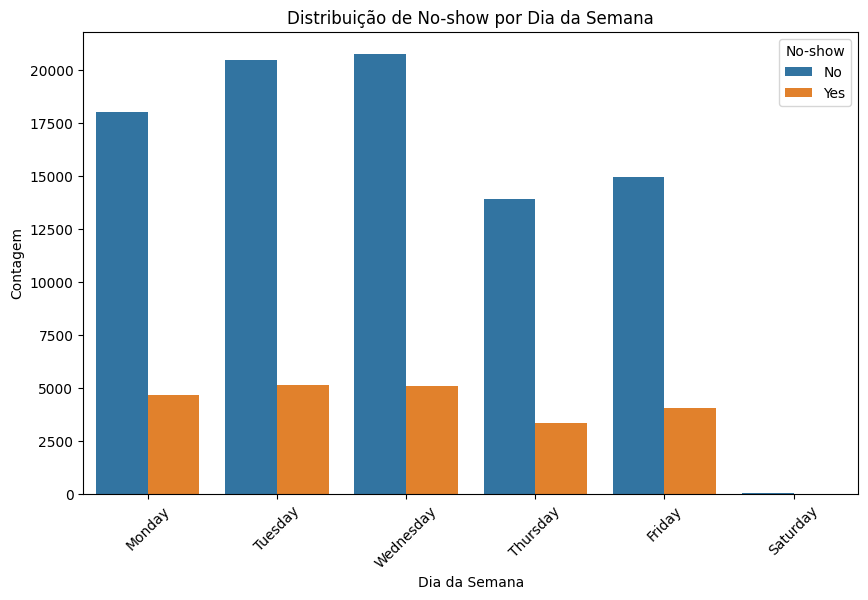

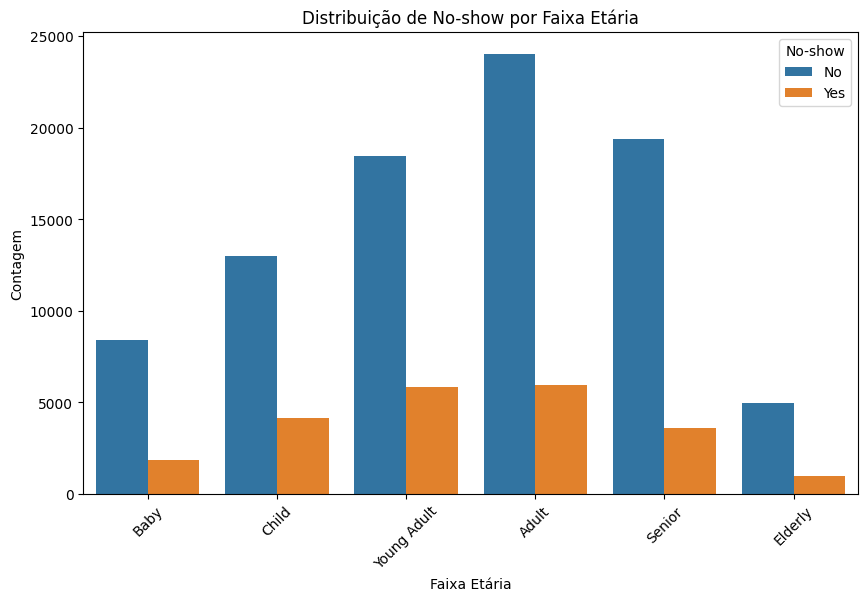

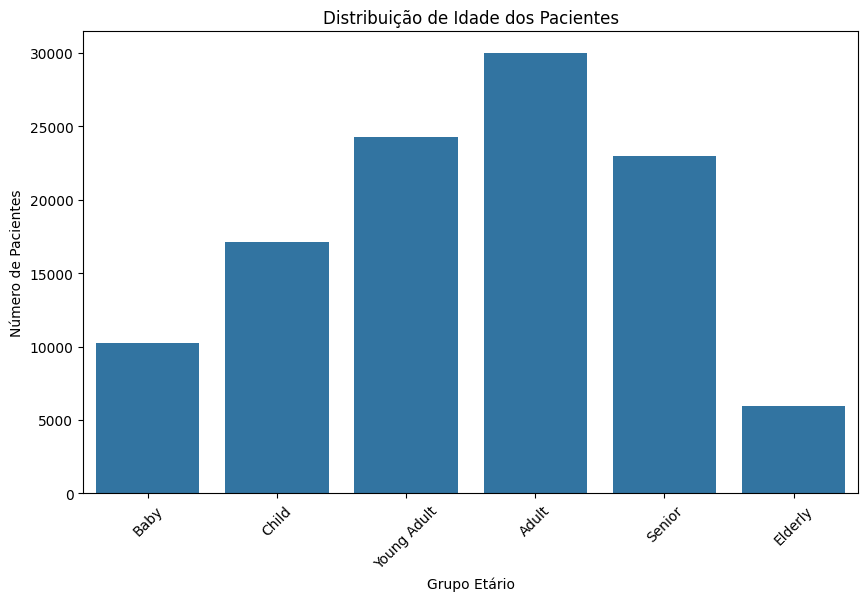

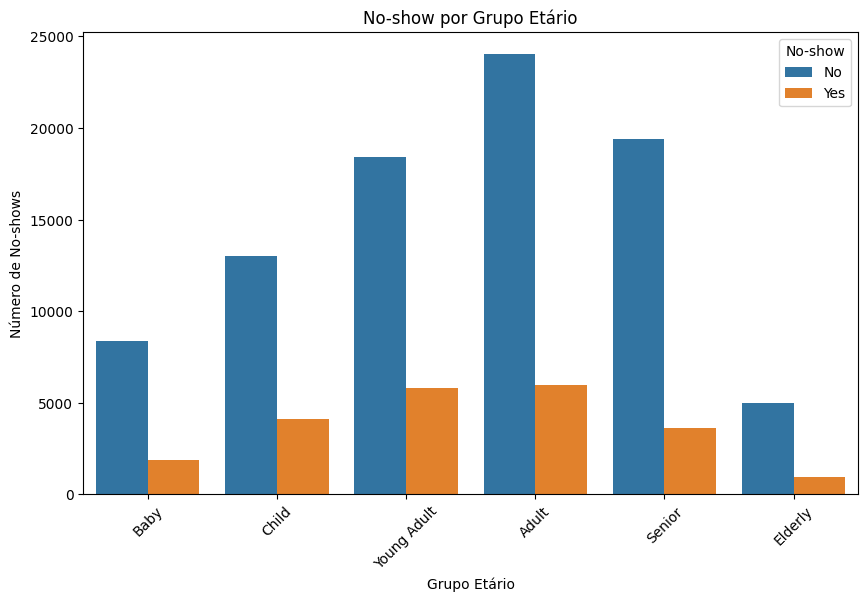

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estatísticas Descritivas para a idade dos pacientes
age_stats = df['Age'].describe()
print("Estatísticas Descritivas para Idade:")
print(age_stats)

# Visualização de Dados para No-show por Dia da Semana
plt.figure(figsize=(10, 6))
sns.countplot(x='AppointmentWeekDay', hue='No-show', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.title('Distribuição de No-show por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Contagem')
plt.legend(title='No-show')
plt.xticks(rotation=45)
plt.show()

# Visualização de Dados para No-show por Faixa Etária
plt.figure(figsize=(10, 6))
sns.countplot(x='AgeGroup', hue='No-show', data=df, order=['Baby', 'Child', 'Young Adult', 'Adult', 'Senior', 'Elderly'])
plt.title('Distribuição de No-show por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Contagem')
plt.legend(title='No-show')
plt.xticks(rotation=45)
plt.show()

# Análise de distribuição de idade
plt.figure(figsize=(10, 6))
sns.countplot(x='AgeGroup', data=df)
plt.title('Distribuição de Idade dos Pacientes')
plt.xlabel('Grupo Etário')
plt.ylabel('Número de Pacientes')
plt.xticks(rotation=45)
plt.show()

# Análise de no-show por grupo etário
plt.figure(figsize=(10, 6))
sns.countplot(x='AgeGroup', hue='No-show', data=df)
plt.title('No-show por Grupo Etário')
plt.xlabel('Grupo Etário')
plt.ylabel('Número de No-shows')
plt.xticks(rotation=45)
plt.legend(title='No-show', loc='upper right')
plt.show()
